[[  1   2   4   8   0   0   0   0]
 [  1   4  16  64   0   0   0   0]
 [  0   0   0   0   1   4  16  64]
 [  0   0   0   0   1   7  49 343]
 [  0   1   8  48   0  -1  -8 -48]
 [  0   0   2  24   0   0  -2 -24]
 [  0   0   2  12   0   0   0   0]
 [  0   0   0   0   0   0   2  42]]
-4.0 + 2.33333333 x + 0.5 x**2 - 0.08333333 x**3
-12.88888889 + 9.0 x - 1.16666667 x**2 + 0.05555556 x**3


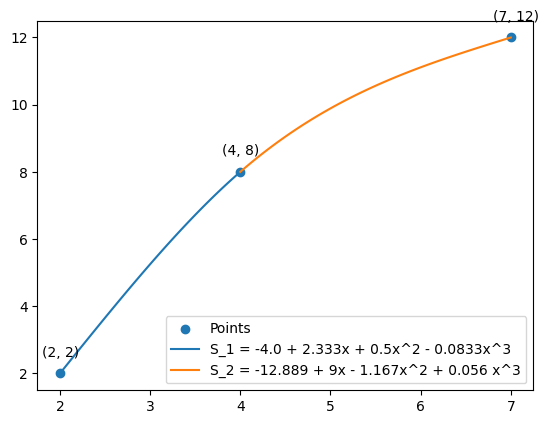

In [ ]:
import numpy as np
from numpy.polynomial import Polynomial
from scipy.linalg import solve
import matplotlib.pyplot as plt


x_list = [2, 4, 7]
y_list = [2, 8,  12]

x_pow0 = np.array([[pow(x, 0)] for x in x_list])
x_pow1 = np.array([[pow(x, 1)] for x in x_list])
x_pow2 = np.array([[pow(x, 2)] for x in x_list])
x_pow3 = np.array([[pow(x, 3)] for x in x_list])

A = np.hstack([x_pow0, x_pow1, x_pow2,  x_pow3])
A = np.insert(A, 2, A[1:2], axis=0)




A = np.vstack(
    [np.pad(A[:2], ((0, 0), (0, 4))),
    np.pad(A[-2:], ((0, 0), (4, 0)))]
)

# 1st -2nd Deriv eqqual at interior points
first_deriv_equal = np.array([0, 1, 2*x_list[1], 3 * x_list[1] ** 2 ])
first_deriv_equal = np.concatenate([first_deriv_equal, -first_deriv_equal])

second_deriv_equal = np.array([0,0, 2, 6 * x_list[1]])
second_deriv_equal = np.concatenate([second_deriv_equal, -second_deriv_equal])



# 2nd derive zero at exterior points
second_deriv1_zero =  np.pad(
    [0,0, 2, 6 * x_list[0]], 
    (0, 4)
)

second_deriv2_zero =  np.pad(
    [0,0, 2, 6 * x_list[-1]], 
    (4, 0)
)

second_deriv2_zero

A = np.vstack([
    *A,
    [first_deriv_equal],
    [second_deriv_equal],
    [second_deriv1_zero],
    [second_deriv2_zero],
])

print(A)

b = [2, 8, 8,  12, 0,0,0,0]

res = solve(A, b)

p1 = Polynomial(coef=res[:4])
p2 = Polynomial(coef=res[-4:])

print(p1)
print(p2)


# Plot points
plt.scatter(x_list, y_list, label="Points")

for x, y in zip(x_list, y_list):
    plt.annotate(f"({x}, {y})", (x,y),xytext=(x - 0.2, y + 0.5 ))

space1 = np.linspace(x_list[0], x_list[1])
space2 = np.linspace(x_list[1], x_list[2])

plt.plot(space1, p1(space1), label=f"S_1 = -4.0 + 2.333x + 0.5x^2 - 0.0833x^3")
plt.plot(space2, p2(space2), label=f"S_2 = -12.889 + 9x - 1.167x^2 + 0.056 x^3")
plt.legend()

## Resulting matrix
A = [
[  1,   2,   4,   8,   0,   0,   0,   0,],
[  1,   4,  16,  64,   0,   0,   0,   0,],
[  0,   0,   0,   0,   1,   4,  16,  64,],
[  0,   0,   0,   0,   1,   7,  49, 343,],
[  0,   1,   8,  48,   0,  -1,  -8, -48,],
[  0,   0,   2,  24,   0,   0,  -2, -24,],
[  0,   0,   2,  12,   0,   0,   0,   0,],
[  0,   0,   0,   0,   0,   0,   2,  42,]
]
b = [2, 8, 8,  12, 0,0,0,0]
res = solve(A, b)

